In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from os import listdir

In [40]:
def file2matrix(filename):
    file = open(filename)
    arrayOfLines = file.readlines()
    data = []
    classLabels = []
    for line in arrayOfLines:
        line = line.strip()
        listFromLine = line.split('\t')
        data.append(listFromLine[:3])
        classLabels.append(listFromLine[-1])
    
    # tranfer the data format from 'String' to 'Float'
    n, p = np.shape(data)
    dataMat = np.zeros((n, p))
    for i in range(n):
        for j in range(p):
            dataMat[i][j] = data[i][j]
        
    # transfer labels elements from 'String' to 'Integer'
    elementsInLabels = np.unique(classLabels)
    for i in range(len(classLabels)):
        if classLabels[i] == elementsInLabels[0]:
            classLabels[i] = 1
        elif classLabels[i] == elementsInLabels[1]:
            classLabels[i] = 2
        else:
            classLabels[i] = 3
    return dataMat, np.array(classLabels)


def file2matrix2(filename):
    file = open(filename)
    arrayOfLines = file.readlines()
    data = []
    classLabels = []
    for line in arrayOfLines:
        line = line.strip()
        listFromLine = line.split('\t')
        data.append(listFromLine[:3])
        classLabels.append(listFromLine[-1])
    
    # tranfer the data format from 'String' to 'Float'
    n, p = np.shape(data)
    dataMat = np.zeros((n, p))
    for i in range(n):
        for j in range(p):
            dataMat[i][j] = data[i][j]
        
    # transfer labels elements from 'String' to 'Integer'
    elementsInLabels = np.unique(classLabels)
    for i in range(len(classLabels)):
        if classLabels[i] == elementsInLabels[0]:
            classLabels[i] = 1
        elif classLabels[i] == elementsInLabels[1]:
            classLabels[i] = 3
        else:
            classLabels[i] = 2
    return dataMat, np.array(classLabels)


def autoNorm(dataArray):
    # (oldValue - min) / max - min
    dataNorm = (dataArray - np.min(dataArray, axis=0)) / np.max(dataArray, axis=0) - np.min(dataArray, axis=0)
    return dataNorm


def knnClassify(traindata, testdata, trainLabels, k):
    n = testdata.shape[0]
    index = [np.argsort(np.sum((testdata[i] - traindata)**2, axis=1))[:k] for i in range(n)]
    nnLabels = trainLabels[index]
    
    # compute for each data, which class occurs most frequently in k naerest neighbours
    predictLabels = []
    for i in range(n):
        unique, counts = np.unique(nnLabels[i], return_counts=True)  # count each unique element(class)
        predictLabels.append(unique[np.argmax(counts)])
    return predictLabels

def testAccuracy(predictLabels, labels):
    n = len(labels)
    count = 0
    for plabel, rlabel in zip(predictLabels, labels):
        print("The classifier came back with: {}, the real answer is: {}".format(plabel, rlabel))
        if plabel == rlabel:
            count += 1
    accuracy = count / n
    return accuracy

In [41]:
filename = 'datingTestSet.txt'
dataMat, classLabels = file2matrix(filename) # dataMat: 1000*3, classLabels: 1000

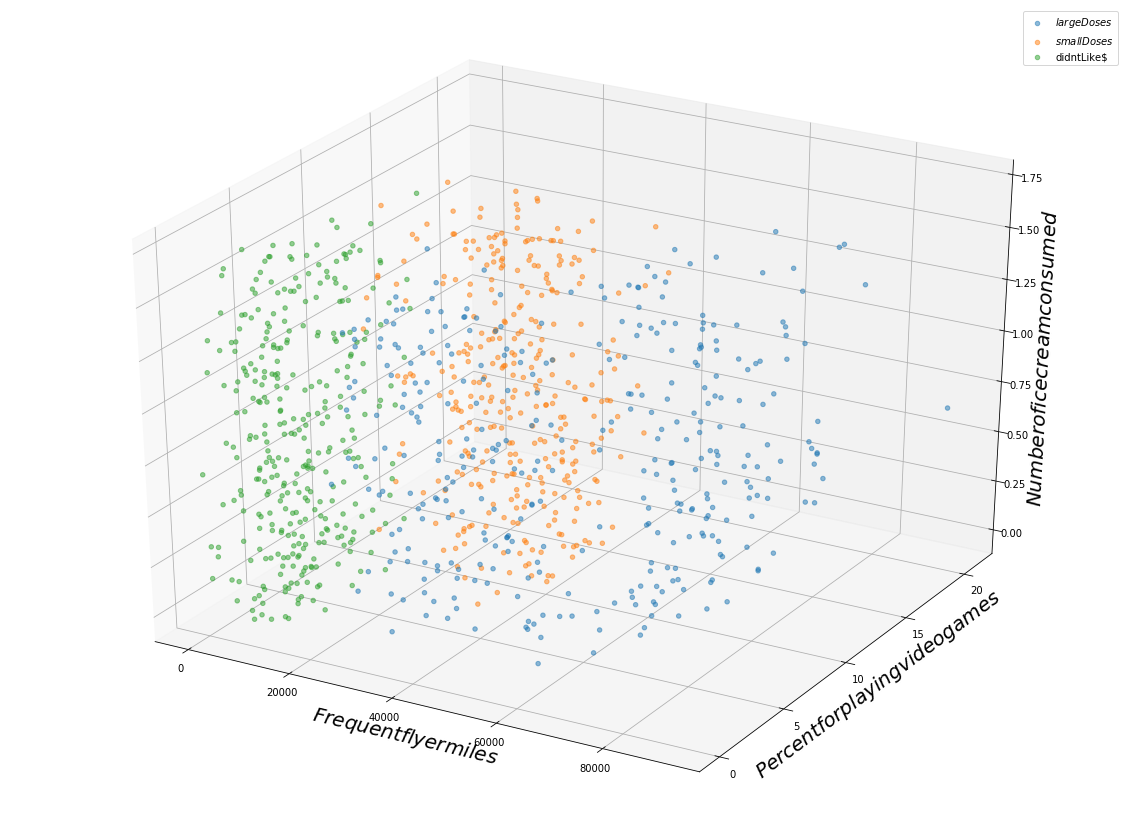

In [42]:
ax = plt.subplot(111, projection='3d')
ax.scatter(dataMat[classLabels==1, 0], dataMat[classLabels==1, 1], dataMat[classLabels==1, 2], alpha=0.5, label=r"$largeDoses$")
ax.scatter(dataMat[classLabels==2, 0], dataMat[classLabels==2, 1], dataMat[classLabels==2, 2], alpha=0.5, label=r"$smallDoses$")
ax.scatter(dataMat[classLabels==3, 0], dataMat[classLabels==3, 1], dataMat[classLabels==3, 2], alpha=0.5, label=r"didntLike$")
ax.legend(loc='best')
ax.set_xlabel(r"$Frequent flyer miles$", Fontsize=20)
ax.set_ylabel(r"$Percent for playing video games$", Fontsize=20)
ax.set_zlabel(r"$Number of ice cream consumed$", Fontsize=20)
plt.rc('figure', figsize=(20, 15))

In [44]:
dataNormTrain = autoNorm(dataMat)
# load test datasets
filename = 'datingTestSet2.txt'
testdataMat, testLabels = file2matrix2(filename) # dataMat: 1000*3, classLabels: 1000
dataNormTest = autoNorm(testdataMat)

predictedLabels = knnClassify(dataNormTrain, dataNormTest, classLabels, 3)
accuracy = testAccuracy(predictedLabels, testLabels)
print("Accuracy is: {}%".format(100*accuracy))

The classifier came back with: 2, the real answer is: 2
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 2, the real answer is: 2
The classifier came back with: 2, the real answer is: 2
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 2, the real answer is: 2
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answe

In [68]:
def img2vector(filename):
    file = open(filename)
    vector = np.zeros(32*32)
    for i in range(32):
        lineStr = file.readline()
        for j in range(32):
            vector[i * 32 + j] = int(lineStr[j])
    return vector

def generateData(filename):
    filelist = listdir(filename)
    vectors = []
    labels = []
    for i in range(len(filelist)):
        vectors.append(img2vector(filename + filelist[i]))
        labels.append(int(filelist[i][0]))
    return np.array(vectors), np.array(labels)

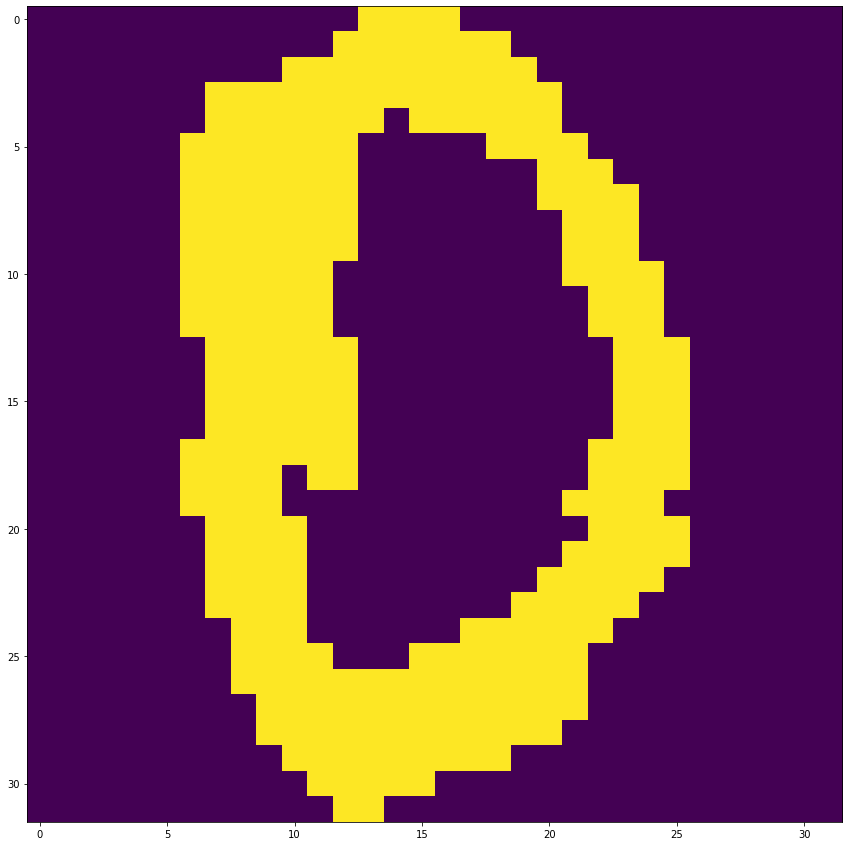

In [69]:
vector = img2vector(filename + '0_0.txt')
plt.imshow(np.reshape(vector, (32, -1)) * 255)

In [70]:
filenameTrain = 'digits/trainingDigits/'
filenameTest = 'digits/testDigits/'
filelist = listdir(filenameTrain)
trainVectors, trainLabels = generateData(filenameTrain) # 1934*1024
testVectors, testLabels = generateData(filenameTest) # 946*1024

In [74]:
predictLabels = knnClassify(trainVectors, testVectors, trainLabels, 3)
accuracy = testAccuracy(predictLabels, testLabels)
print("Accuracy is:" + "%.2f" % (100*accuracy) +"%")

The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answer is: 0
The classifier came back with: 0, the real answe